# Tony Ding's Lab4
USC ID#:8961530140

# (a)

Download the YouTube Spam Collection data set from: https://archive.ics.
uci.edu/ml/datasets/YouTube+Spam+Collection. We will mainly work with
the Eminem file. Note that the chronological order of the comments were kept.
(5 pts)

# (b)

Select the first floor(0.8H) of H hams and the first floor(0.8S) of S spams as your training
set and the rest as your test set. (10 pts)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score


In [2]:
df = pd.read_csv('../data/YouTube-Spam-Collection-v1/Youtube04-Eminem.csv')
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


In [3]:
ham = df[df.CLASS == 0]
spam = df[df.CLASS == 1]

In [4]:
#get the total number of ham
ham_count = ham.count()[0]

In [5]:
#get the total number of spam
spam_count = spam.count()[0]

In [6]:
print("The first",math.floor(ham_count*0.8),"rows are train set for ham.")
print("The remaining",ham_count-math.floor(ham_count*0.8),"rows are test set for ham.")
print("The first",math.floor(spam_count*0.8),"rows are train set for spam.")
print("The remaining",spam_count-math.floor(spam_count*0.8),"rows are test set for spam.")

The first 162 rows are train set for ham.
The remaining 41 rows are test set for ham.
The first 196 rows are train set for spam.
The remaining 49 rows are test set for spam.


In [7]:
ham_train = ham.iloc[0:162]
ham_test = ham.iloc[162:]
spam_train = spam.iloc[0:196]
spam_test = spam.iloc[196:]

train = pd.concat([ham_train,spam_train])
test = pd.concat([ham_test,spam_test])

In [8]:
train_pre = train.iloc[:,3]
train_y = train.iloc[:,4]
test_pre = test.iloc[:,3]
test_y = test.iloc[:,4]

# (c)

Represent each comment using TF-IDF features. Consider each comment a document and the whole set of comments in the file (e.g. Eminem) as the corpus.
Do NOT remove stop words.
(10 pts)

In [9]:
corpus = []
for i in range (df.shape[0]):
    corpus.append(df.iloc[i,3])

This gives us the corpus with all the comments.

In [10]:
vectorizer = TfidfVectorizer()

train_x = vectorizer.fit_transform(train_pre)
test_x = vectorizer.transform(test_pre)

train_x and test_x are now represented in TF-IDF features here. 

# (d)  L2-penalized Logistic Regression

(i) Determine λ using five fold cross-validation on your training set. Consider
log10 λ ∈ {−5, −4, . . . , 5}. (5 pts)

In [11]:
lgr = LogisticRegression()
penalty = ['l2']
c = [1/pow(10,i) for i in range (-5,6,1)]
parameters = {"C":c,
              "penalty": penalty,
              "solver":['liblinear']}
gridcv = GridSearchCV(lgr,parameters,cv = 5,n_jobs = -1)
best_model = gridcv.fit(train_x,train_y)
best_lambda_l2 = best_model.best_estimator_.get_params()['C']
print("The best λ, which is the inverse of C, to use here is",1/best_lambda_l2)

The best λ, which is the inverse of C, to use here is 0.01


# (d) (ii)

Train L2-penalized Logistic Regression using the λ you found in 1(d)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well
as the ROC curve and AUC for your training set. (10 pts)

In [12]:
#lgr_l2 = LogisticRegression(penalty='l2',C = best_lambda_l2, n_jobs = -1).fit(train_x,train_y)

In [13]:
train_pred_l2 = best_model.predict(train_x)

print("Confusion Matrix for training set with L2 penalty:")
print(confusion_matrix(train_pred_l2,train_y))

Confusion Matrix for training set with L2 penalty:
[[162   0]
 [  0 196]]


In [14]:
print(classification_report(train_y,train_pred_l2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



According to the above classification report, we know that the accuracy score is 1.00.

In [15]:
precision_train_l2 = precision_score(train_y,train_pred_l2)
print("Precision score for training set =", format(precision_train_l2,'.4f'))

recall_train_l2 = recall_score(train_y,train_pred_l2)
print("Recall score for training set =", format(recall_train_l2,'.4f'))

f1_Score_train_l2 = f1_score(train_y,train_pred_l2)
print("F1-score for training set =", format(f1_Score_train_l2,'.4f'))

Precision score for training set = 1.0000
Recall score for training set = 1.0000
F1-score for training set = 1.0000


In [16]:
fpr, tpr, _ = roc_curve(train_y,train_pred_l2,pos_label=1)
logit_roc_auc_l2 = roc_auc_score(train_y,train_pred_l2)
print("AUC for training set =", format(logit_roc_auc_l2,'.4f'))


AUC for training set = 1.0000


ROC curve for training set with L2 penalty:


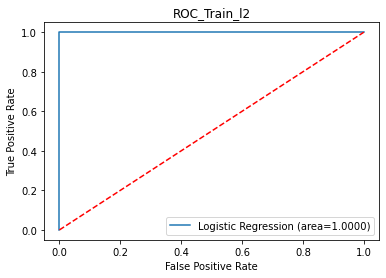

In [17]:
print("ROC curve for training set with L2 penalty:")

plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.4f)'%logit_roc_auc_l2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Train_l2')
plt.legend(loc='lower right')
plt.show()


# (d) (iii)

Test the algorithm on the test set and calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for
the test set. Which one is more important in this application, precision or
recall? Calculate Fβ score for β ∈ {0.1, 0.5, .9, 1, 5, 10}. (15 pts)

In [18]:
test_pred_l2 = best_model.predict(test_x)

print("Confusion Matrix for test set with L2 penalty:")
print(confusion_matrix(test_pred_l2,test_y))

Confusion Matrix for test set with L2 penalty:
[[40  1]
 [ 1 48]]


In [19]:
print(classification_report(test_y,test_pred_l2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.98      0.98      0.98        49

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



According to the above classification report, we know that the accuracy score is 0.98.

In [20]:
precision_test_l2 = precision_score(test_y,test_pred_l2)
print("Precision score for test set =", format(precision_test_l2,'.4f'))

recall_test_l2 = recall_score(test_y,test_pred_l2)
print("Recall score for test set =", format(recall_test_l2,'.4f'))

f1_Score_test_l2 = f1_score(test_y,test_pred_l2)
print("F1-score for test set =", format(f1_Score_test_l2,'.4f'))

Precision score for test set = 0.9796
Recall score for test set = 0.9796
F1-score for test set = 0.9796


In [21]:
fpr_2, tpr_2, _ = roc_curve(test_y,test_pred_l2,pos_label=1)
logit_roc_auc_l2_test = roc_auc_score(test_y,test_pred_l2)
print("AUC for test set =", format(logit_roc_auc_l2_test,'.4f'))

AUC for test set = 0.9776


ROC curve for test set with L2 penalty:


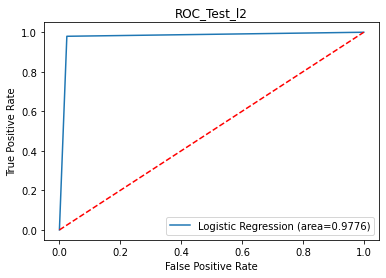

In [22]:
print("ROC curve for test set with L2 penalty:")

plt.figure()
plt.plot(fpr_2,tpr_2,label='Logistic Regression (area=%0.4f)'%logit_roc_auc_l2_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Test_l2')
plt.legend(loc='lower right')
plt.show()


Under this scenario, we tolerate more spam-recognized-as-ham than ham-recognized-as-spam, which means we prioritize having lower false positive rate. Hence, in this case, precision is more important than recall.

In [23]:
for i in [0.1,0.5,0.9,1,5,10]:
    fbetascore = fbeta_score(test_y,test_pred_l2,beta = i)
    print("F-beta score when beta is",i,"equals to",format(fbetascore,'.6f'))


F-beta score when beta is 0.1 equals to 0.979592
F-beta score when beta is 0.5 equals to 0.979592
F-beta score when beta is 0.9 equals to 0.979592
F-beta score when beta is 1 equals to 0.979592
F-beta score when beta is 5 equals to 0.979592
F-beta score when beta is 10 equals to 0.979592


# (e) L1-penalized Logistic Regression

(i) Determine λ using five fold cross-validation on your training set. Consider
log10 λ ∈ {−5, −4, . . . , 5}. (5 pts)

In [24]:
lgr = LogisticRegression()
penalty = ['l1']
c = [1/pow(10,i) for i in range (-5,6,1)]
parameters = {"C":c,
              "penalty": penalty,
              "solver":['liblinear']}
gridcv_l1 = GridSearchCV(lgr,parameters,cv = 5,n_jobs = -1)
best_model_l1 = gridcv_l1.fit(train_x,train_y)
best_lambda_l1 = best_model_l1.best_estimator_.get_params()['C']
print("The best λ, which is the inverse of C, to use here is",1/best_lambda_l1)

The best λ, which is the inverse of C, to use here is 0.0001


FYI: Since there's some randomness to GridSearchCV sampling, the best C/lambda can vary among multiple executions of code, and the best C that I got actually includes 100, 1000, and 10000.

# (e) (ii)

Train L1-penalized Logistic Regression using the λ you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well
as the ROC curve and AUC for your training set. (15 pts)

In [25]:
#lgr_l1 = LogisticRegression(penalty='l1',C = best_lambda_l1, solver='liblinear').fit(train_x,train_y)

In [26]:
train_pred_l1 = best_model_l1.predict(train_x)

print("Confusion Matrix for training set with L1 penalty:")
print(confusion_matrix(train_pred_l1,train_y))

Confusion Matrix for training set with L1 penalty:
[[162   0]
 [  0 196]]


In [27]:
print(classification_report(train_y,train_pred_l1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



According to the above classification report, we know that the accuracy score is 1.00.

In [28]:
precision_train_l1 = precision_score(train_y,train_pred_l1)
print("Precision score for training set =", format(precision_train_l1,'.4f'))

recall_train_l1 = recall_score(train_y,train_pred_l1)
print("Recall score for training set =", format(recall_train_l1,'.4f'))

f1_Score_train_l1 = f1_score(train_y,train_pred_l1)
print("F1-score for training set =", format(f1_Score_train_l1,'.4f'))

Precision score for training set = 1.0000
Recall score for training set = 1.0000
F1-score for training set = 1.0000


In [29]:
fpr_3, tpr_3, _ = roc_curve(train_y,train_pred_l1,pos_label=1)
logit_roc_auc_l1 = roc_auc_score(train_y,train_pred_l1)
print("AUC for training set =", format(logit_roc_auc_l1,'.4f'))


AUC for training set = 1.0000


ROC curve for training set with L1 penalty:


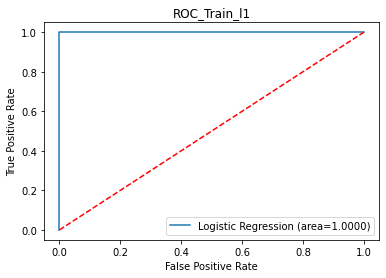

In [30]:
print("ROC curve for training set with L1 penalty:")

plt.figure()
plt.plot(fpr_3,tpr_3,label='Logistic Regression (area=%0.4f)'%logit_roc_auc_l1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Train_l1')
plt.legend(loc='lower right')
plt.show()


# (e) (iii)

Test the algorithm on the test set and calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for
the test set. (10 pts)

In [31]:
test_pred_l1 = best_model_l1.predict(test_x)

print("Confusion Matrix for test set with L1 penalty:")
print(confusion_matrix(test_pred_l1,test_y))

Confusion Matrix for test set with L1 penalty:
[[40  1]
 [ 1 48]]


In [32]:
print(classification_report(test_y,test_pred_l1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.98      0.98      0.98        49

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



According to the above classification report, we know that the accuracy score is 0.96.

In [33]:
precision_test_l1 = precision_score(test_y,test_pred_l1)
print("Precision score for test set =", format(precision_test_l1,'.4f'))

recall_test_l1 = recall_score(test_y,test_pred_l1)
print("Recall score for test set =", format(recall_test_l1,'.4f'))

f1_Score_test_l1 = f1_score(test_y,test_pred_l1)
print("F1-score for test set =", format(f1_Score_test_l1,'.4f'))

Precision score for test set = 0.9796
Recall score for test set = 0.9796
F1-score for test set = 0.9796


In [34]:
fpr_4, tpr_4, _ = roc_curve(test_y,test_pred_l1,pos_label=1)
logit_roc_auc_l1_test = roc_auc_score(test_y,test_pred_l1)
print("AUC for test set =", format(logit_roc_auc_l1_test,'.4f'))

AUC for test set = 0.9776


ROC curve for test set with L1 penalty:


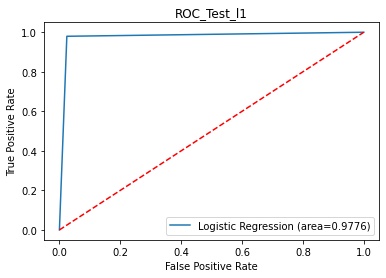

In [35]:
print("ROC curve for test set with L1 penalty:")

plt.figure()
plt.plot(fpr_4,tpr_4,label='Logistic Regression (area=%0.4f)'%logit_roc_auc_l1_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Test_l1')
plt.legend(loc='lower right')
plt.show()

# (f) Binary Classification Using Naive Bayes’ Classifiers

i. Solve the problem using a Naive Bayes’ classifier. Use Gaussian class conditional distributions. Report the confusion matrix, ROC, precision, recall, F1
score, and AUC for both the train and test data sets. (15 pts)

In [36]:
gnb = GaussianNB()
gnb.fit(train_x.toarray(),train_y)

GaussianNB()

In [37]:
y_train_gnb = gnb.predict(train_x.toarray())
y_test_gnb = gnb.predict(test_x.toarray())

In [38]:
print("Confusion Matrix for training set:")
print(confusion_matrix(y_train_gnb,train_y))

Confusion Matrix for training set:
[[162   1]
 [  0 195]]


In [39]:
print("Confusion Matrix for test set:")
print(confusion_matrix(y_test_gnb,test_y))

Confusion Matrix for test set:
[[35  1]
 [ 6 48]]


In [40]:
precision_train_gnb = precision_score(train_y,y_train_gnb)
print("Precision score for training set =", format(precision_train_gnb,'.4f'))

recall_train_gnb = recall_score(train_y,y_train_gnb)
print("Recall score for training set =", format(recall_train_gnb,'.4f'))

f1_Score_train_gnb = f1_score(train_y,y_train_gnb)
print("F1-score for training set =", format(f1_Score_train_gnb,'.4f'))

Precision score for training set = 1.0000
Recall score for training set = 0.9949
F1-score for training set = 0.9974


In [41]:
precision_test_gnb = precision_score(test_y,y_test_gnb)
print("Precision score for test set =", format(precision_test_gnb,'.4f'))

recall_test_gnb = recall_score(test_y,y_test_gnb)
print("Recall score for test set =", format(recall_test_gnb,'.4f'))

f1_Score_test_gnb = f1_score(test_y,y_test_gnb)
print("F1-score for test set =", format(f1_Score_test_gnb,'.4f'))

Precision score for test set = 0.8889
Recall score for test set = 0.9796
F1-score for test set = 0.9320


In [42]:
fpr_nb, tpr_nb, _ = roc_curve(train_y,y_train_gnb,pos_label=1)
logit_roc_auc_nb = roc_auc_score(train_y,y_train_gnb)
print("AUC for training set =", format(logit_roc_auc_nb,'.4f'))

AUC for training set = 0.9974


ROC curve for training set using Naive Bayes':


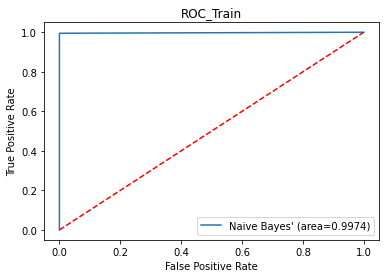

In [43]:
print("ROC curve for training set using Naive Bayes\':")

plt.figure()
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes\' (area=%0.4f)'%logit_roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Train')
plt.legend(loc='lower right')
plt.show()


In [44]:
fpr2_nb, tpr2_nb, _ = roc_curve(test_y,y_test_gnb,pos_label=1)
logit_roc_auc2_nb = roc_auc_score(test_y,y_test_gnb)
print("AUC for test set =", format(logit_roc_auc2_nb,'.4f'))

AUC for test set = 0.9166


ROC curve for test set using Naive Bayes':


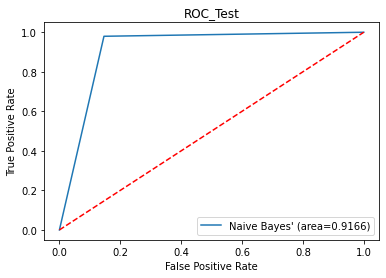

In [45]:
print("ROC curve for test set using Naive Bayes\':")

plt.figure()
plt.plot(fpr2_nb,tpr2_nb,label='Naive Bayes\' (area=%0.4f)'%logit_roc_auc2_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Test')
plt.legend(loc='lower right')
plt.show()

# (g) 

(Extra Credit, 5 points) Repeat 1(f)i using multinomial priors.

In [46]:
mnb = MultinomialNB()
mnb.fit(train_x,train_y)

MultinomialNB()

In [47]:
y_train_mnb = mnb.predict(train_x)
y_test_mnb = mnb.predict(test_x)

In [48]:
print("Confusion Matrix for training set:")
print(confusion_matrix(y_train_mnb,train_y))

Confusion Matrix for training set:
[[155   1]
 [  7 195]]


In [49]:
print("Confusion Matrix for test set:")
print(confusion_matrix(y_test_mnb,test_y))

Confusion Matrix for test set:
[[32  0]
 [ 9 49]]


In [50]:
precision_train_mnb = precision_score(train_y,y_train_mnb)
print("Precision score for training set =", format(precision_train_mnb,'.4f'))

recall_train_mnb = recall_score(train_y,y_train_mnb)
print("Recall score for training set =", format(recall_train_mnb,'.4f'))

f1_Score_train_mnb = f1_score(train_y,y_train_mnb)
print("F1-score for training set =", format(f1_Score_train_mnb,'.4f'))

Precision score for training set = 0.9653
Recall score for training set = 0.9949
F1-score for training set = 0.9799


In [51]:
precision_test_mnb = precision_score(test_y,y_test_mnb)
print("Precision score for test set =", format(precision_test_mnb,'.4f'))

recall_test_mnb = recall_score(test_y,y_test_mnb)
print("Recall score for test set =", format(recall_test_mnb,'.4f'))

f1_Score_test_mnb = f1_score(test_y,y_test_mnb)
print("F1-score for test set =", format(f1_Score_test_mnb,'.4f'))

Precision score for test set = 0.8448
Recall score for test set = 1.0000
F1-score for test set = 0.9159


In [52]:
fpr_mnb, tpr_mnb, _ = roc_curve(train_y,y_train_mnb,pos_label=1)
logit_roc_auc_mnb = roc_auc_score(train_y,y_train_mnb)
print("AUC for training set =", format(logit_roc_auc_mnb,'.4f'))

AUC for training set = 0.9758


ROC curve for training set using multinomial priors:


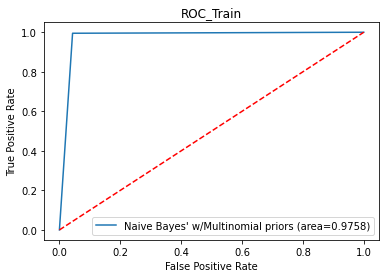

In [53]:
print("ROC curve for training set using multinomial priors:")

plt.figure()
plt.plot(fpr_mnb,tpr_mnb,label='Naive Bayes\' w/Multinomial priors (area=%0.4f)'%logit_roc_auc_mnb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Train')
plt.legend(loc='lower right')
plt.show()

In [54]:
fpr2_mnb, tpr2_mnb, _ = roc_curve(test_y,y_test_mnb,pos_label=1)
logit_roc_auc2_mnb = roc_auc_score(test_y,y_test_mnb)
print("AUC for test set =", format(logit_roc_auc2_mnb,'.4f'))

AUC for test set = 0.8902


ROC curve for test set using multinomial priors:


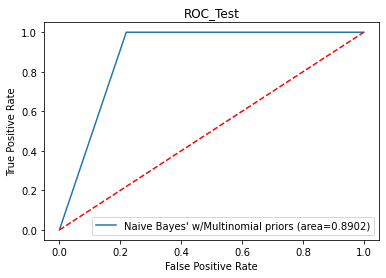

In [55]:
print("ROC curve for test set using multinomial priors:")

plt.figure()
plt.plot(fpr2_mnb,tpr2_mnb,label='Naive Bayes\' w/Multinomial priors (area=%0.4f)'%logit_roc_auc2_mnb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Test')
plt.legend(loc='lower right')
plt.show()

# References

1.Discussion 10 (04/02/2021) Link: https://usc.zoom.us/rec/share/By5vcsnPNUmd05R1oG84yRZG0ex_DiRP2IZuRkcFlLMkM3BRkTERTIypasg9jX4x.geksDwlcuIZrH4Fa

2.For calculating F-Beta scores:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html